<h1>   Assignment 2<h/h1>

In [94]:
#Standard Imports needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

# Make plots look good
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [95]:
#Reading the data
df = pd.read_csv("data.csv")

<h1>Data Cleaning / Prep </h1>

In [96]:
# Confirming it read correctly
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [97]:
#Inspecting the dataframe 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [98]:
#Identifying the empty collumn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [99]:
#Checking for Nul Values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<h1> Cleaning  </h1>

In [100]:
#Acrually removing what doesnt need ot be computed
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [101]:
# Confirming that worked
#df.info()

In [102]:
# Replace the values in the 'diagnosis' column with 1 and 0
df['diagnosis'] = df['diagnosis'].replace({'M':1, 'B':0})

In [103]:
# Checking the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (569, 31)


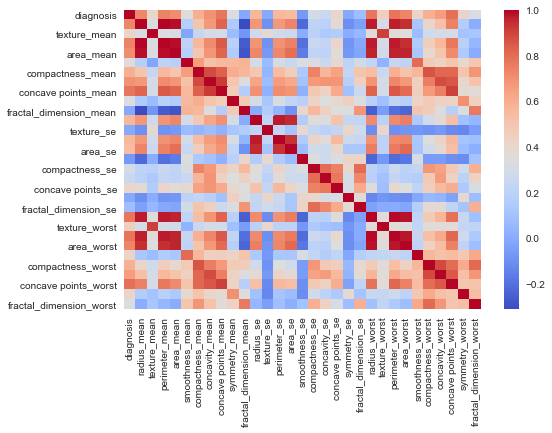

In [104]:
# Checking the correlation, anything with a dark colour in dignosis directly relates to diagnosis.

# Create a correlation matrix
corr_matrix = df.corr()

# Generate a heatmap with color-coded correlation coefficients
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)

# Show the plot
plt.show()

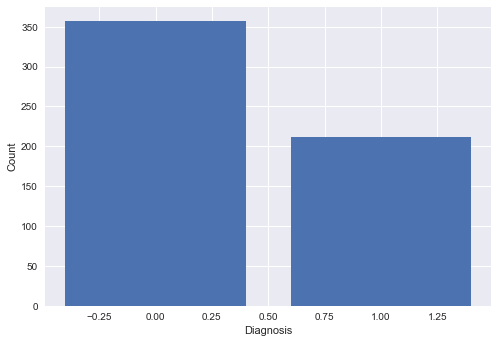

0    357
1    212
Name: diagnosis, dtype: int64


In [105]:
# Checking the distribution
diagnosis_count = df['diagnosis'].value_counts()
plt.bar(diagnosis_count.index, diagnosis_count.values)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
diagnosis_count = df['diagnosis'].value_counts()
print(diagnosis_count)

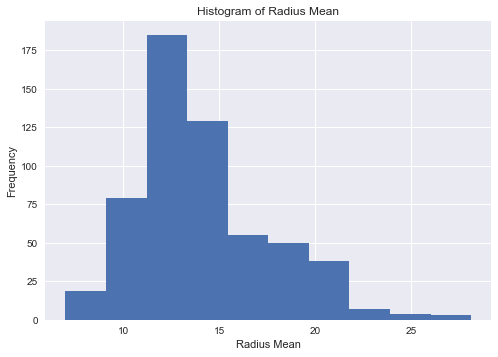

In [106]:
#Plotting the raduia mean, tried a few others but 
plt.hist(df['radius_mean'])
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Mean')
plt.show()

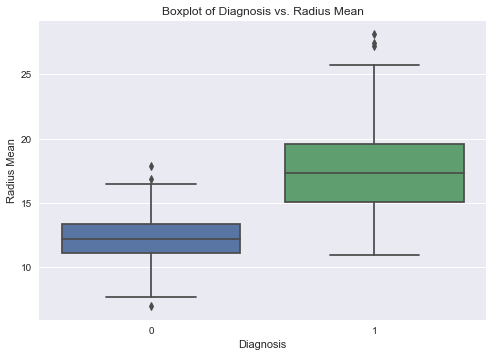

In [107]:
# boxplot to show some outliers, not an issue when computing (and when removed made no change)
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.title('Boxplot of Diagnosis vs. Radius Mean')
plt.show()

In [108]:
# Replace the values in the 'diagnosis' column with 1 and 0
df['diagnosis'] = df['diagnosis'].replace({'M':1, 'B':0})

<h1> My Machine Learning Approach Neural Network </h1>

In [109]:
# Separate the target variable from the features
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

# Preprocess the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets with fixed random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, input_dim=X.shape[1], activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print a summary of the model architecture
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
plot_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Predict the test set labels
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 30)                930       
                                                                 
 dense_41 (Dense)            (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.4264 - binary_accuracy: 0.8374 - val_loss: 0.3310 - val_binary_accuracy: 0.9386
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2863 - binary_accuracy: 0.9099 - val_loss: 0.2440 - val_binary_accuracy: 0.9561
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2247 - binary_accuracy: 0.9319 - val_loss: 0.1939 - val_binary_acc

In [67]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy score
loss_value, accuracy_value = model.evaluate(X_test, y_test)

# Print the accuracy score
print("Accuracy Score: {:.2f}%".format(accuracy_value * 100))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[70  1]
 [ 2 41]]
4/4 [==============================] - 0s 2ms/step - loss: 0.0790 - binary_accuracy: 0.9737
Accuracy Score: 97.37%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



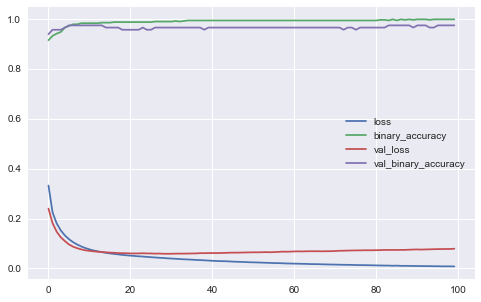

        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.331965         0.914286  0.239739             0.938596
1   0.224075         0.931868  0.180875             0.956140
2   0.180331         0.940659  0.147044             0.956140
3   0.152419         0.947253  0.124754             0.956140
4   0.132134         0.964835  0.109544             0.964912
..       ...              ...       ...                  ...
95  0.008786         0.997802  0.077475             0.973684
96  0.008358         0.997802  0.077631             0.973684
97  0.008387         0.997802  0.077862             0.973684
98  0.008265         0.997802  0.077938             0.973684
99  0.007956         0.997802  0.079041             0.973684

[100 rows x 4 columns]


In [68]:
# Plot the training history
pd.DataFrame(plot_data.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

# Print the training history data
print(pd.DataFrame(plot_data.history))

In [69]:
# Separate the target variable from the features
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

# Preprocess the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets with fixed random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define the neural network architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, input_dim=X.shape[1], activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print a summary of the model architecture
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
plot_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# Predict the test set labels
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 30)                930       
                                                                 
 dense_35 (Dense)            (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.6144 - binary_accuracy: 0.6901 - val_loss: 0.4444 - val_binary_accuracy: 0.8509
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3995 - binary_accuracy: 0.8769 - val_loss: 0.3372 - val_binary_accuracy: 0.9211
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3040 - binary_accuracy: 0.9253 - val_loss: 0.2626 - val_binary_acc

In [70]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy score
loss_value, accuracy_value = model.evaluate(X_test, y_test)

# Print the accuracy score
print("Accuracy Score: {:.2f}%".format(accuracy_value * 100))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[74  1]
 [ 0 39]]
4/4 [==============================] - 0s 2ms/step - loss: 0.0307 - binary_accuracy: 0.9912
Accuracy Score: 99.12%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



<h1> This changed sometimes so I have pasted the output here for reference </h1>

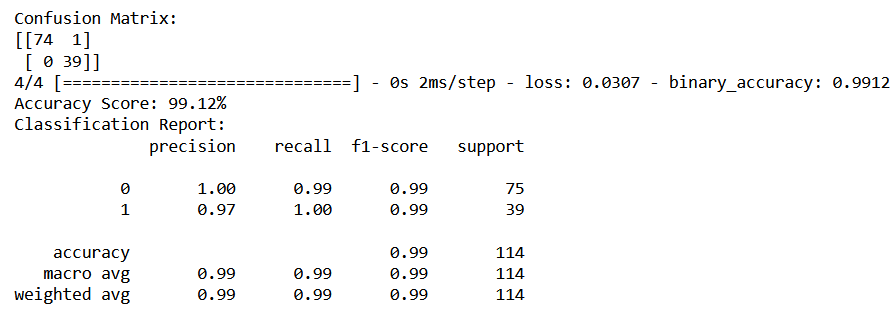

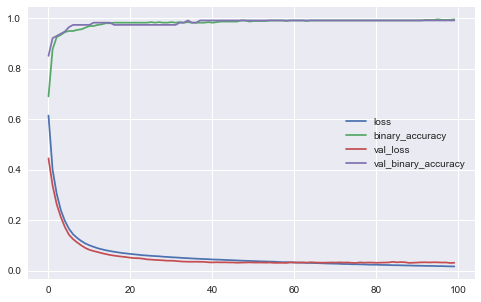

        loss  binary_accuracy  val_loss  val_binary_accuracy
0   0.614382         0.690110  0.444386             0.850877
1   0.399519         0.876923  0.337161             0.921053
2   0.304012         0.925275  0.262594             0.929825
3   0.239770         0.934066  0.212811             0.938596
4   0.196524         0.945055  0.172167             0.947368
..       ...              ...       ...                  ...
95  0.017285         0.995604  0.032235             0.991228
96  0.017533         0.993407  0.031656             0.991228
97  0.016761         0.993407  0.031840             0.991228
98  0.016498         0.993407  0.029798             0.991228
99  0.016118         0.995604  0.030713             0.991228

[100 rows x 4 columns]


In [71]:
# Plot the training history
pd.DataFrame(plot_data.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

# Print the training history data
print(pd.DataFrame(plot_data.history))

<h1> Appendix </h1>

<h2> Caroline Pawley's Code Section for Comparison </h2>

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df.columns
feature_df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]


# Independent variable
X = np.asarray(feature_df)

# Dependent variable
y = np.asarray(df['diagnosis'])
y=y.astype('int')

# Independent variable
X = np.asarray(feature_df)

# Dependent variable
y = np.asarray(df['diagnosis'])
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Radial Basis Function
model_rbf = SVC(kernel='rbf')

model_rbf.fit(X_train,y_train)

y_pred = model_rbf.predict(X_test)

acc_rbf = accuracy_score(y_test,y_pred)
print("Accuracy:","\n",acc_rbf,"\n")

print("Classification Report: ","\n", classification_report(y_test,y_pred))

print("Confusion Matrix: ","\n", confusion_matrix(y_test, y_pred))

Accuracy: 
 0.9824561403508771 

Classification Report:  
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:  
 [[71  0]
 [ 2 41]]


<h1> Additional EDA </h1> 

In [114]:
# Experimenting with Larger Epochs (not much better due to overfitting)
# Separate the target variable from the features
y = df['diagnosis']
X = df.drop(['diagnosis'], axis=1)

# Preprocess the data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets with fixed random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define the neural network architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(30, input_dim=X.shape[1], activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print a summary of the model architecture
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'])

# Train the model
plot_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

# Predict the test set labels
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 30)                930       
                                                                 
 dense_47 (Dense)            (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
15/15 [==============================] - 0s 9ms/step - loss: 0.4147 - binary_accuracy: 0.8571 - val_loss: 0.3433 - val_binary_accuracy: 0.8947
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2836 - binary_accuracy: 0.9253 - val_loss: 0.2601 - val_binary_accuracy: 0.9298
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2198 - binary_accuracy: 0.9473 - val_loss: 0.2041 - val_binary_acc

15/15 [==============================] - 0s 2ms/step - loss: 0.0111 - binary_accuracy: 0.9956 - val_loss: 0.0396 - val_binary_accuracy: 0.9825
Epoch 102/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0109 - binary_accuracy: 0.9956 - val_loss: 0.0391 - val_binary_accuracy: 0.9825
Epoch 103/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0105 - binary_accuracy: 0.9978 - val_loss: 0.0384 - val_binary_accuracy: 0.9825
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0105 - binary_accuracy: 0.9978 - val_loss: 0.0396 - val_binary_accuracy: 0.9825
Epoch 105/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0103 - binary_accuracy: 0.9978 - val_loss: 0.0397 - val_binary_accuracy: 0.9825
Epoch 106/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0099 - binary_accuracy: 0.9978 - val_loss: 0.0385 - val_binary_accuracy: 0.9825
Epoch 107/500
15/15 [==============================] - 0s 2ms/step - los

15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.0532 - val_binary_accuracy: 0.9912
Epoch 206/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 0.0525 - val_binary_accuracy: 0.9912
Epoch 207/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.0529 - val_binary_accuracy: 0.9912
Epoch 208/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.0525 - val_binary_accuracy: 0.9912
Epoch 209/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.0524 - val_binary_accuracy: 0.9912
Epoch 210/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 0.0532 - val_binary_accuracy: 0.9912
Epoch 211/500
15/15 [==============================] - 0s 3ms/step - los

Epoch 307/500
15/15 [==============================] - 0s 3ms/step - loss: 3.1524e-04 - binary_accuracy: 1.0000 - val_loss: 0.0657 - val_binary_accuracy: 0.9912
Epoch 308/500
15/15 [==============================] - 0s 3ms/step - loss: 2.9062e-04 - binary_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9912
Epoch 309/500
15/15 [==============================] - 0s 3ms/step - loss: 2.8057e-04 - binary_accuracy: 1.0000 - val_loss: 0.0670 - val_binary_accuracy: 0.9912
Epoch 310/500
15/15 [==============================] - 0s 3ms/step - loss: 2.9502e-04 - binary_accuracy: 1.0000 - val_loss: 0.0656 - val_binary_accuracy: 0.9912
Epoch 311/500
15/15 [==============================] - 0s 3ms/step - loss: 2.8307e-04 - binary_accuracy: 1.0000 - val_loss: 0.0662 - val_binary_accuracy: 0.9912
Epoch 312/500
15/15 [==============================] - 0s 3ms/step - loss: 2.8660e-04 - binary_accuracy: 1.0000 - val_loss: 0.0653 - val_binary_accuracy: 0.9912
Epoch 313/500
15/15 [=============

Epoch 358/500
15/15 [==============================] - 0s 2ms/step - loss: 1.6923e-04 - binary_accuracy: 1.0000 - val_loss: 0.0715 - val_binary_accuracy: 0.9912
Epoch 359/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6480e-04 - binary_accuracy: 1.0000 - val_loss: 0.0720 - val_binary_accuracy: 0.9912
Epoch 360/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6976e-04 - binary_accuracy: 1.0000 - val_loss: 0.0721 - val_binary_accuracy: 0.9912
Epoch 361/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6236e-04 - binary_accuracy: 1.0000 - val_loss: 0.0725 - val_binary_accuracy: 0.9912
Epoch 362/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6270e-04 - binary_accuracy: 1.0000 - val_loss: 0.0712 - val_binary_accuracy: 0.9912
Epoch 363/500
15/15 [==============================] - 0s 3ms/step - loss: 1.6708e-04 - binary_accuracy: 1.0000 - val_loss: 0.0718 - val_binary_accuracy: 0.9912
Epoch 364/500
15/15 [=============

Epoch 409/500
15/15 [==============================] - 0s 3ms/step - loss: 1.1092e-04 - binary_accuracy: 1.0000 - val_loss: 0.0757 - val_binary_accuracy: 0.9912
Epoch 410/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0994e-04 - binary_accuracy: 1.0000 - val_loss: 0.0759 - val_binary_accuracy: 0.9912
Epoch 411/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0796e-04 - binary_accuracy: 1.0000 - val_loss: 0.0760 - val_binary_accuracy: 0.9912
Epoch 412/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0652e-04 - binary_accuracy: 1.0000 - val_loss: 0.0762 - val_binary_accuracy: 0.9912
Epoch 413/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0688e-04 - binary_accuracy: 1.0000 - val_loss: 0.0756 - val_binary_accuracy: 0.9912
Epoch 414/500
15/15 [==============================] - 0s 3ms/step - loss: 1.0529e-04 - binary_accuracy: 1.0000 - val_loss: 0.0758 - val_binary_accuracy: 0.9912
Epoch 415/500
15/15 [=============

Epoch 460/500
15/15 [==============================] - 0s 2ms/step - loss: 8.0461e-05 - binary_accuracy: 1.0000 - val_loss: 0.0809 - val_binary_accuracy: 0.9912
Epoch 461/500
15/15 [==============================] - 0s 3ms/step - loss: 7.9874e-05 - binary_accuracy: 1.0000 - val_loss: 0.0804 - val_binary_accuracy: 0.9912
Epoch 462/500
15/15 [==============================] - 0s 2ms/step - loss: 7.9690e-05 - binary_accuracy: 1.0000 - val_loss: 0.0798 - val_binary_accuracy: 0.9912
Epoch 463/500
15/15 [==============================] - 0s 3ms/step - loss: 8.0246e-05 - binary_accuracy: 1.0000 - val_loss: 0.0796 - val_binary_accuracy: 0.9912
Epoch 464/500
15/15 [==============================] - 0s 2ms/step - loss: 7.7650e-05 - binary_accuracy: 1.0000 - val_loss: 0.0794 - val_binary_accuracy: 0.9912
Epoch 465/500
15/15 [==============================] - 0s 2ms/step - loss: 7.8077e-05 - binary_accuracy: 1.0000 - val_loss: 0.0785 - val_binary_accuracy: 0.9912
Epoch 466/500
15/15 [=============

In [115]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Confusion Matrix:
[[74  1]
 [ 0 39]]
Accuracy: 0.9912280701754386


In [116]:
# Print the classification report
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99        75
   Malignant       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



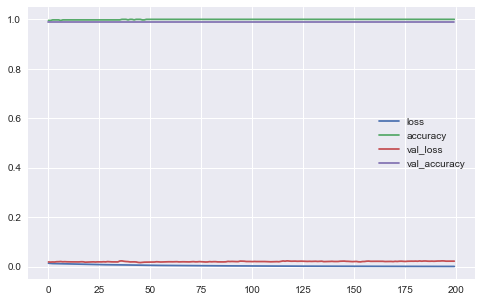

In [139]:
# Plot the training history
pd.DataFrame(plot_data.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [87]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the accuracy score
print("Accuracy Score: {:.2f}%".format(accuracy*100))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[74  1]
 [ 0 39]]
Accuracy Score: 99.12%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [142]:
# What are the data types of the columns in the dataset?
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            floa

In [143]:
# Are there any missing values in the dataset?
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [144]:
# What is the range and distribution of the other variables?
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


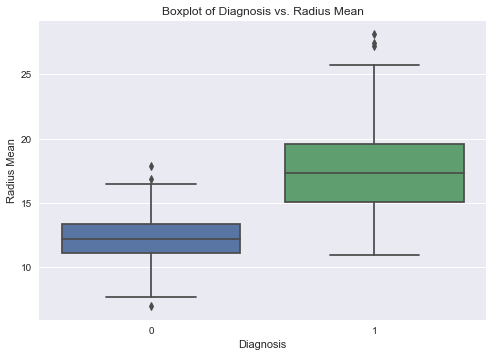

In [145]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.title('Boxplot of Diagnosis vs. Radius Mean')
plt.show()

Not too much to worry about here, noticed but not necessary to clean.

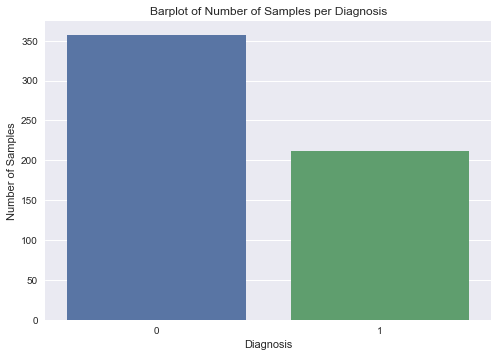

In [146]:
class_counts = df['diagnosis'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Diagnosis')
plt.ylabel('Number of Samples')
plt.title('Barplot of Number of Samples per Diagnosis')
plt.show()

In [61]:
mean_radius = df['radius_mean'].mean()
median_radius = df['radius_mean'].median()
std_radius = df['radius_mean'].std()

print('Mean radius:', mean_radius)
print('Median radius:', median_radius)
print('Standard deviation of radius:', std_radius)

Mean radius: 14.127291739894563
Median radius: 13.37
Standard deviation of radius: 3.524048826212078


In [62]:
corr = df['radius_mean'].corr(df['texture_mean'])
print('Correlation between radius mean and texture mean:', corr)

Correlation between radius mean and texture mean: 0.3237818909277331


In [77]:
#df = pd.read_csv("data.csv")?
print("Malignant Cases:")
print(M[["smoothness_mean", "compactness_mean"]].describe())
print("\nBenign Cases:")
print(B[["smoothness_mean", "compactness_mean"]].describe())

Malignant Cases:


NameError: name 'M' is not defined

In [ ]:
# Increasing the amount of Epochs to analyse in a list - this took so much time and was not worth it.
epochs = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Using the Epochs to train the data
for epoch in epochs:

#This is another way to process the data I explored, although this didnt change my results so I moved it down here
# Preprocess the data again
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the neural network architecture
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(30, input_dim=X.shape[1], activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
metrics=['binary_accuracy'])

# Train the model
plot_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix for epoch {epoch}:")
print(cm)

# Plot the training history
pd.DataFrame(plot_data.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

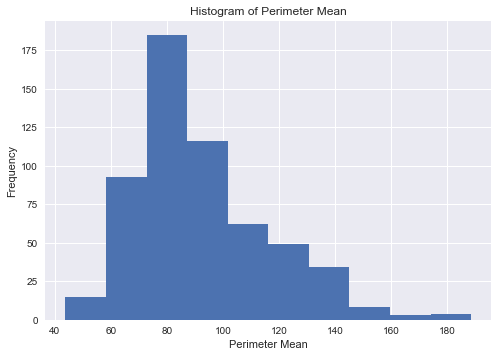

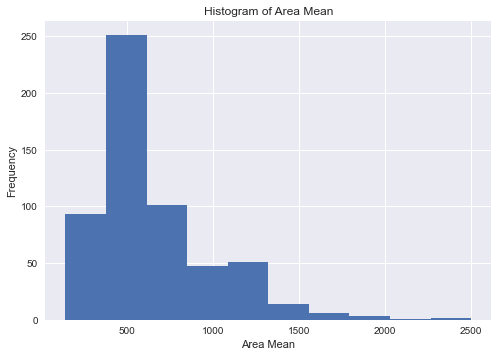

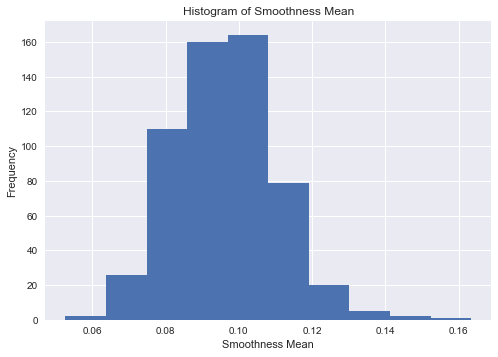

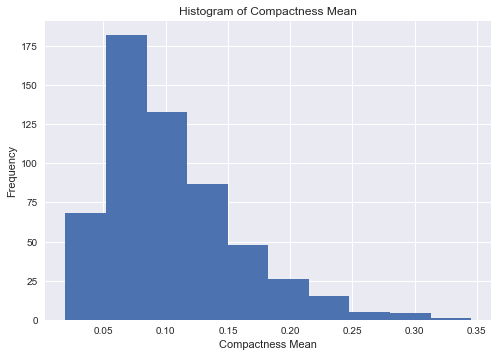

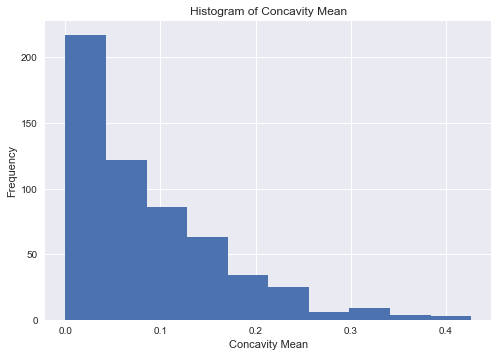

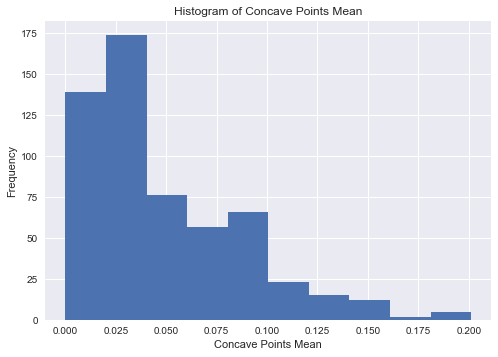

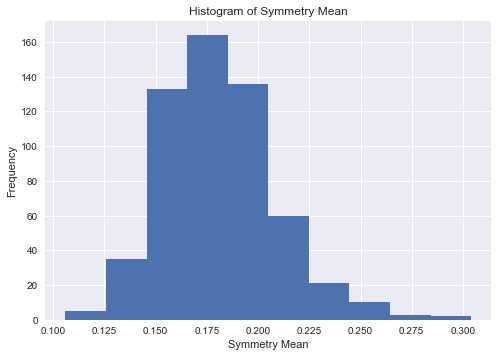

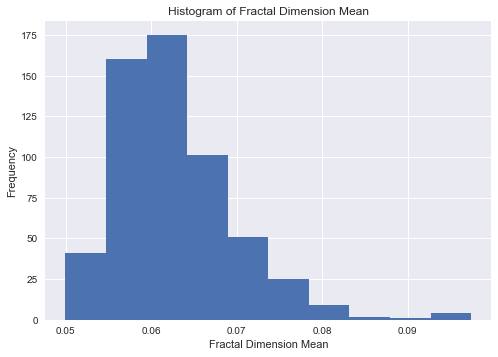

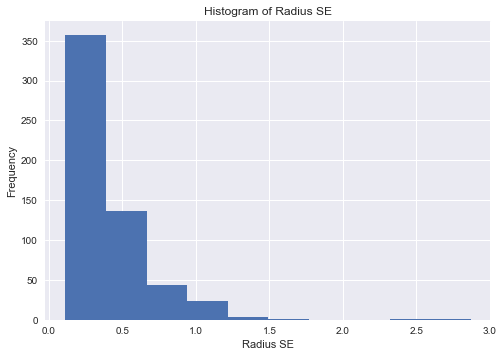

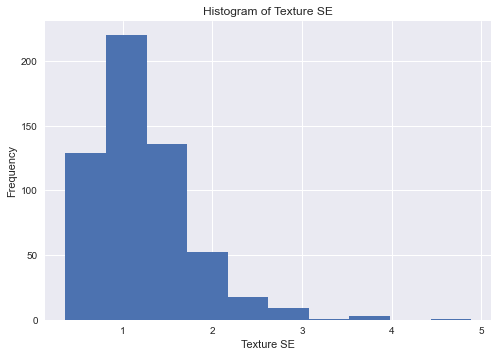

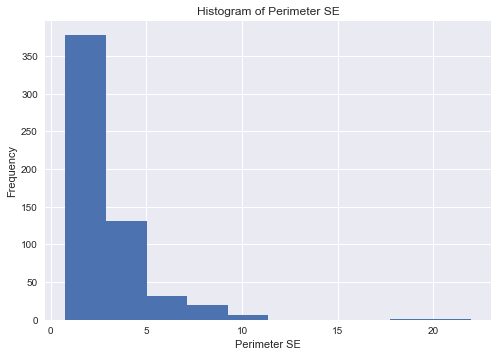

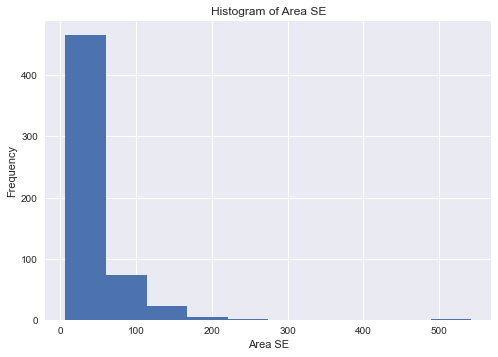

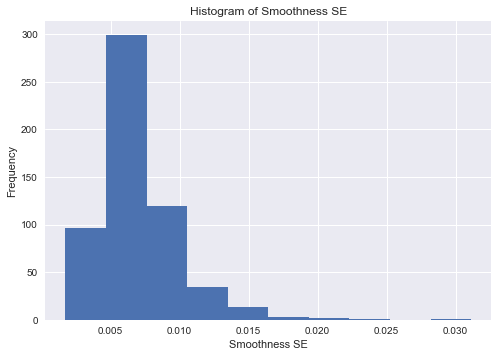

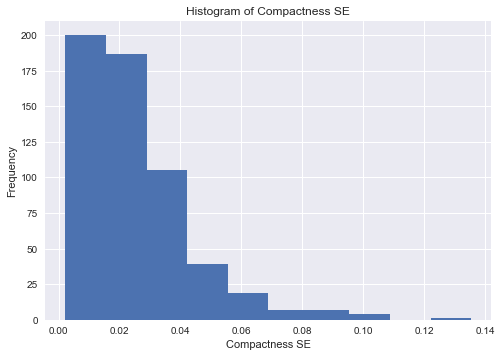

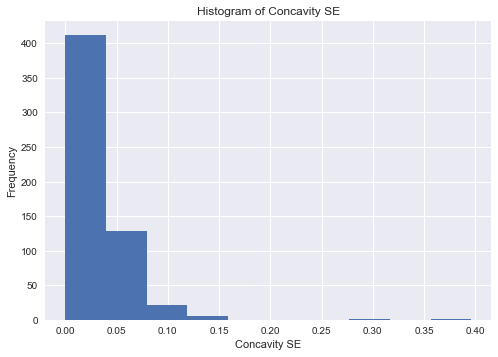

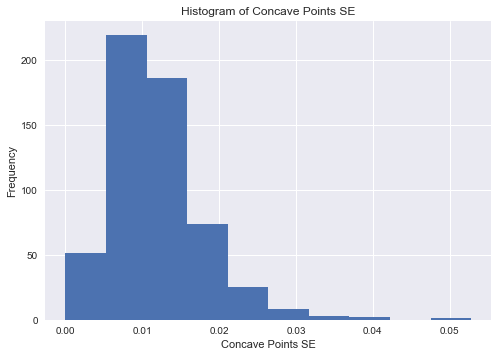

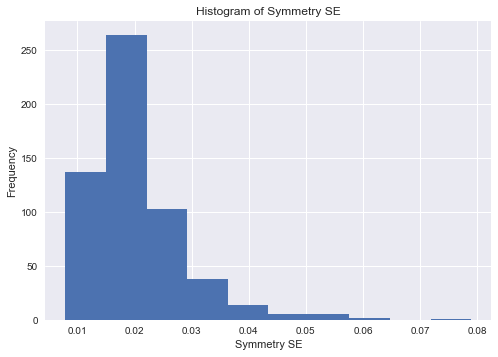

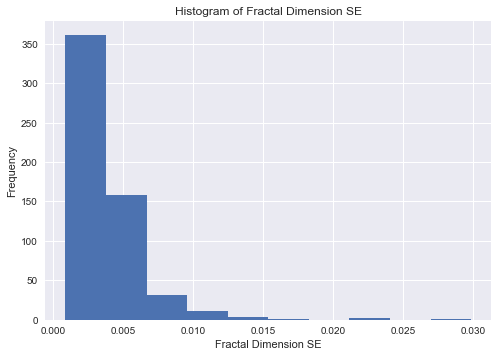

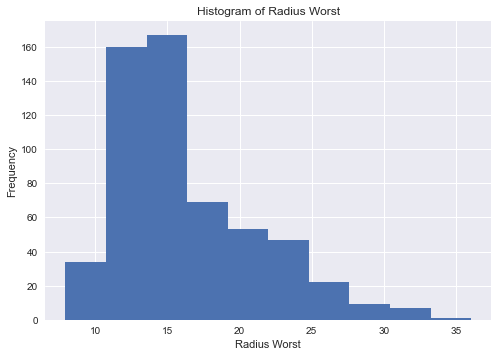

In [80]:
#Every plot - Not necessary but it works
# Histogram for perimeter_mean column
plt.hist(df['perimeter_mean'])
plt.xlabel('Perimeter Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Perimeter Mean')
plt.show()

# Histogram for area_mean column
plt.hist(df['area_mean'])
plt.xlabel('Area Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Area Mean')
plt.show()

# Histogram for smoothness_mean column
plt.hist(df['smoothness_mean'])
plt.xlabel('Smoothness Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Smoothness Mean')
plt.show()

# Histogram for compactness_mean column
plt.hist(df['compactness_mean'])
plt.xlabel('Compactness Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Compactness Mean')
plt.show()

# Histogram for concavity_mean column
plt.hist(df['concavity_mean'])
plt.xlabel('Concavity Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Concavity Mean')
plt.show()

# Histogram for concave points_mean column
plt.hist(df['concave points_mean'])
plt.xlabel('Concave Points Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Concave Points Mean')
plt.show()

# Histogram for symmetry_mean column
plt.hist(df['symmetry_mean'])
plt.xlabel('Symmetry Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Symmetry Mean')
plt.show()

# Histogram for fractal_dimension_mean column
plt.hist(df['fractal_dimension_mean'])
plt.xlabel('Fractal Dimension Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Fractal Dimension Mean')
plt.show()

# Histogram for radius_se column
plt.hist(df['radius_se'])
plt.xlabel('Radius SE')
plt.ylabel('Frequency')
plt.title('Histogram of Radius SE')
plt.show()

# Histogram for texture_se column
plt.hist(df['texture_se'])
plt.xlabel('Texture SE')
plt.ylabel('Frequency')
plt.title('Histogram of Texture SE')
plt.show()

# Histogram for perimeter_se column
plt.hist(df['perimeter_se'])
plt.xlabel('Perimeter SE')
plt.ylabel('Frequency')
plt.title('Histogram of Perimeter SE')
plt.show()

# Histogram for area_se column
plt.hist(df['area_se'])
plt.xlabel('Area SE')
plt.ylabel('Frequency')
plt.title('Histogram of Area SE')
plt.show()

# Histogram for smoothness_se column
plt.hist(df['smoothness_se'])
plt.xlabel('Smoothness SE')
plt.ylabel('Frequency')
plt.title('Histogram of Smoothness SE')
plt.show()

# Histogram for compactness_se column
plt.hist(df['compactness_se'])
plt.xlabel('Compactness SE')
plt.ylabel('Frequency')
plt.title('Histogram of Compactness SE')
plt.show()

# Histogram for concavity_se column
plt.hist(df['concavity_se'])
plt.xlabel('Concavity SE')
plt.ylabel('Frequency')
plt.title('Histogram of Concavity SE')
plt.show()

# Histogram for concave points_se column
plt.hist(df['concave points_se'])
plt.xlabel('Concave Points SE')
plt.ylabel('Frequency')
plt.title('Histogram of Concave Points SE')
plt.show()

# Histogram for symmetry_se column
plt.hist(df['symmetry_se'])
plt.xlabel('Symmetry SE')
plt.ylabel('Frequency')
plt.title('Histogram of Symmetry SE')
plt.show()

# Histogram for fractal_dimension_se column
plt.hist(df['fractal_dimension_se'])
plt.xlabel('Fractal Dimension SE')
plt.ylabel('Frequency')
plt.title('Histogram of Fractal Dimension SE')
plt.show()

# Histogram for radius_worst column
plt.hist(df['radius_worst'])
plt.xlabel('Radius Worst')
plt.ylabel('Frequency')
plt.title('Histogram of Radius Worst')
plt.show()